In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
flights = pd.read_csv("data/flights.csv")

In [99]:
#dropping cancelled flights
flights.drop(flights.loc[flights['cancelled'] == 1].index,inplace=True)

In [100]:
#dropping diverted flights
flights.drop(flights.loc[flights['diverted'] == 1].index,inplace=True)

In [101]:
#Drop unnecessary columns
flights = flights.drop(columns = ['no_name', 'longest_add_gtime','total_add_gtime'
                                          ,'cancelled','diverted','first_dep_time'
                                          ,'cancellation_code','tail_num'],axis=1)

In [102]:
flights.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
dep_delay                  88
taxi_out                  115
wheels_off                115
wheels_on                 115
taxi_in                   115
crs_arr_time                0
arr_time                    0
arr_delay                  57
dup                         0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                  115
flights                     0
distance                    0
carrier_delay          237247
weather_delay          237247
nas_delay              237247
security_delay         237247
late_aircr

In [103]:
def fill_columns(fill,columns,df):
    for col in columns:
        df[col].fillna(fill,inplace=True)

In [104]:
# Fill all null delays columns with 0.
columns = ['late_aircraft_delay','security_delay','nas_delay','weather_delay','carrier_delay','dep_delay','arr_delay']
fill_columns(0,columns,flights)

In [105]:
# Drop flights with no air_time value 155 rows.
flights.drop(flights.loc[flights['air_time'].isnull()].index,inplace=True)

In [106]:
flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [70]:
#Export the cleaned dataframe
flights.to_csv('data/flights_cleaned_with_delays.csv')

## Outlier Removal

In [107]:
flights['arr_delay']

0        -16.0
1         15.0
2        -12.0
3        -17.0
4         17.0
          ... 
299995    -2.0
299996    -6.0
299997    16.0
299998   -25.0
299999    -5.0
Name: arr_delay, Length: 294286, dtype: float64

In [116]:
#Remvoving outliers for Arrival
Q1_arrival = flights.arr_delay.quantile(0.25)
Q3_arrival = flights.arr_delay.quantile(0.75)
IQR = Q3_arrival - Q1_arrival
flights_no_outlier_iqr = flights.loc[(flights['arr_delay'] >= (Q1_arrival - 1.5*IQR))\
                                     & (flights['arr_delay'] <= Q3_arrival + 1.5*IQR)]

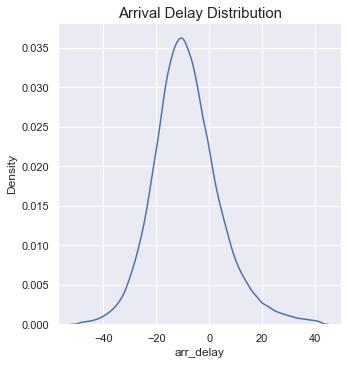

In [121]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [119]:
# Removing outliers for departure delay
Q1_dep = flights_no_outlier_iqr.dep_delay.quantile(0.25)
Q3_dep = flights_no_outlier_iqr.dep_delay.quantile(0.75)
IQR_dep = Q3_dep - Q1_dep
flights_no_outlier_iqr = flights_no_outlier_iqr.loc[(flights_no_outlier_iqr['dep_delay'] >= (Q1_dep - 1.5*IQR_dep))\
                                     & (flights_no_outlier_iqr['dep_delay'] <= Q3_dep + 1.5*IQR_dep)]

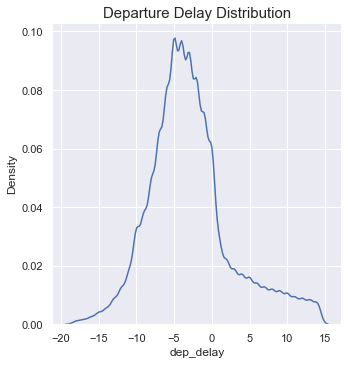

In [122]:
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution", size=15)
plt.show()

In [135]:
flights_no_outlier_iqr.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,combined_delay
0,2019-05-22,DL,DL,DL,544,DL,544,11433,DTW,"Detroit, MI",...,101.0,82.0,1,632,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27,AA,AA,AA,2036,AA,2036,12953,LGA,"New York, NY",...,119.0,81.0,1,544,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-05,UA,UA_CODESHARE,UA,5306,OO,5306,11292,DEN,"Denver, CO",...,120.0,105.0,1,649,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-02-23,AA,AA_CODESHARE,AA,5365,OH,5365,11146,CRW,"Charleston/Dunbar, WV",...,90.0,56.0,1,221,0.0,0.0,0.0,0.0,0.0,0.0
6,2019-10-09,DL,DL,DL,758,DL,758,10423,AUS,"Austin, TX",...,196.0,178.0,1,1242,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# Add delays to column named combined_delay
columns = ['late_aircraft_delay','security_delay','nas_delay','weather_delay','carrier_delay']
flights_no_outlier_iqr['combined_delay'] = 0
for col in columns:
    flights_no_outlier_iqr['combined_delay'] = flights_no_outlier_iqr['combined_delay']+flights_no_outlier_iqr[col]


In [134]:
flights_no_outlier_iqr['combined_delay'].sort_values(ascending=False)

232104    42.0
56643     42.0
213856    42.0
247442    42.0
236578    42.0
          ... 
197480     0.0
197478     0.0
197476     0.0
197474     0.0
0          0.0
Name: combined_delay, Length: 237189, dtype: float64

In [123]:
flights_no_outlier_iqr.shape

(237189, 34)

In [136]:
# Export dataframe with no outlier to csv
flights_no_outlier_iqr.to_csv('data/flights_cleaned_no_outlier_iqr_with_delays.csv')